In [1]:
import numpy as np

In [2]:
class KMeans():
    def __init__(self):
        self.centroids = []
        self.distance_function = None
        self.max_iterations = 10000
    
    def initialize_random(self, centroid_number, data):
        data_count, dimensions = data.shape
        selected_rows = np.random.choice(range(data_count), centroid_number)
        self.centroids = data[selected_rows]
        return self
        
    def initialize_plus_plus(self, centroid_number, data):
        self.centroids = np.random.choice(data, centroid_number)
        return self

    def with_euclidian_distance(self):
        self.distance_function = np.linalg.norm
        return self
    
    def set_max_iterations(self, iterations):
        self.max_iterations = iterations
        return self

    def train(self, X):
        current_iteration = 0
        while(current_iteration < self.max_iterations):
            self.fit(X)
            current_iteration += 1
        return self
    
    def predict(self, x):
        group_id, bmu = self.get_bmu(x)
        return group_id, bmu

    def get_bmu(self, x):
        bmu_id, bmu, bmu_dist = 0, self.centroids[0], self.distance_function(self.centroids[0] - x)
        for i, c in enumerate(self.centroids[1:], 1):
            c_dist = self.distance_function(c - x)
            if c_dist < bmu_dist:
                bmu_id, bmu, bmu_dist = i, c, c_dist
        return bmu_id, bmu

    def fit(self, X):
        groups = [[] for i in self.centroids]
        for x in X:
            bmu_id, _ = self.get_bmu(x)
            groups[bmu_id].append(x)
        
        for group_id, _ in enumerate(groups):
            group_mean = np.mean(groups[group_id], 0) if len(groups[group_id]) > 0 else None
            if group_mean is not None:
                self.centroids[group_id] = group_mean

In [3]:
def read_data(path):
    x = np.genfromtxt(path, delimiter=',', skip_header=1)
    x = np.delete(x, 0, axis=1)
    return x

In [4]:
data = read_data('data/bbc/BsaidaBin98.csv')
data.shape

(737, 1369)

## Toy datasets

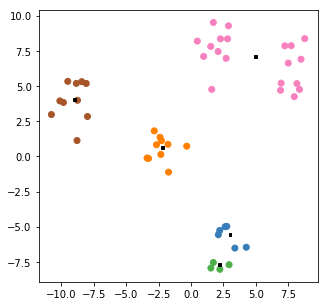

In [31]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from itertools import cycle, islice
%matplotlib inline

blobs = datasets.make_blobs(n_samples=50, centers=5, random_state=20)
fig = plt.figure(figsize=(5, 5))

# plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
#                     hspace=.01)
X, y = blobs

kmeans = KMeans() \
            .initialize_random(5, X) \
            .with_euclidian_distance() \
            .set_max_iterations(10) \
            .train(X)

predictions = [kmeans.predict(x) for x in X]
y_pred = [y for y, _ in predictions]

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))

plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
for i, centroid in enumerate(kmeans.centroids):
    square = plt.Rectangle(centroid, 0.21, 0.2, color='black')
    fig.gca().add_artist(square)

plt.show()